In [224]:
from matplotlib import pyplot as plt
from imutils.object_detection import non_max_suppression
import imutils
import numpy as np
import cv2

In [225]:
# Download some images containing people
!wget 'https://www.wsha.org/wp-content/uploads/banner-diverse-group-of-people-2.jpg'

--2022-01-25 11:31:35--  https://www.wsha.org/wp-content/uploads/banner-diverse-group-of-people-2.jpg
Resolving www.wsha.org (www.wsha.org)... 104.198.7.33
Connecting to www.wsha.org (www.wsha.org)|104.198.7.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1923610 (1.8M) [image/jpeg]
Saving to: ‘banner-diverse-group-of-people-2.jpg’

   banner-diverse-g   5%[>                   ] 103.65K  24.5KB/s    eta 87s    ^C


In [226]:
image = cv2.imread('images/banner-diverse-group-of-people-2.jpg')

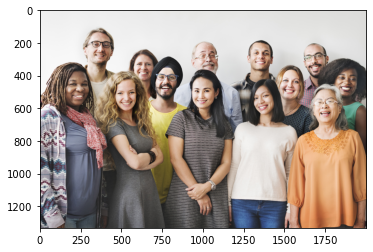

In [227]:
plt.imshow(image[:,:,::-1])

In [228]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [230]:
r,w = hog.detectMultiScale(image,winStride=(1,1), padding=(1,1), scale=1.2)

In [231]:
r

array([[1168,  382,  181,  364],
       [1246,  381,  191,  382],
       [ 467,  115,  330,  660],
       [1342,  252,  396,  793],
       [1472,  664,  112,  224],
       [ 996,  169,  111,  221],
       [ 377,  184,   77,  154],
       [1762,  822,   77,  154]], dtype=int32)

In [232]:
rects = np.array([(x, y, x+w, y+r) for (x, y, w, r) in r])
rects

array([[1168,  382, 1349,  746],
       [1246,  381, 1437,  763],
       [ 467,  115,  797,  775],
       [1342,  252, 1738, 1045],
       [1472,  664, 1584,  888],
       [ 996,  169, 1107,  390],
       [ 377,  184,  454,  338],
       [1762,  822, 1839,  976]], dtype=int32)

In [233]:
# Perform Non-max suppression
rects_NMS = non_max_suppression(rects, probs=None, overlapThresh=.2)
rects_NMS

array([[1342,  252, 1738, 1045],
       [1762,  822, 1839,  976],
       [ 467,  115,  797,  775],
       [1168,  382, 1349,  746],
       [ 996,  169, 1107,  390],
       [ 377,  184,  454,  338]])

In [234]:
for  (x1, y1, x2, y2) in rects_NMS:
    cv2.rectangle(image, (x1, y1), (x2, y2), (0,0,255), 3)

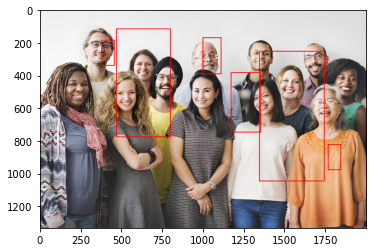

In [235]:
plt.imshow(image[:,:,::-1])

In [236]:
import matplotlib.pyplot as plt
from imutils.object_detection import non_max_suppression
import numpy as np

In [237]:
# Lets try doing this again using a completely different image
# Download new image
!wget 'https://www.finra.org/sites/default/files/Fin_Pro_0.png'

--2022-01-25 11:33:56--  https://www.finra.org/sites/default/files/Fin_Pro_0.png
Resolving www.finra.org (www.finra.org)... 104.18.0.70, 104.18.1.70
Connecting to www.finra.org (www.finra.org)|104.18.0.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 585153 (571K) [image/png]
Saving to: ‘Fin_Pro_0.png’

Fin_Pro_0.png       100%[===================>] 571.44K   147KB/s    in 3.9s    

2022-01-25 11:34:02 (147 KB/s) - ‘Fin_Pro_0.png’ saved [585153/585153]



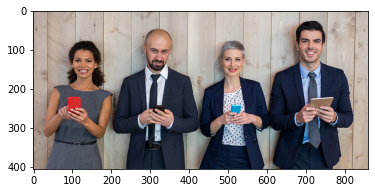

In [238]:
img = cv2.imread('images/Fin_Pro_0.png')
plt.imshow(img[:,:,::-1])

In [239]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(hog.getDefaultPeopleDetector())

In [240]:
r,c = hog.detectMultiScale(img, padding=(1,1), winStride=(1,1), scale=1.2)

In [241]:
r

array([[ 74,  63,  77, 154],
       [393, 158,  69, 138],
       [629, 174,  77, 154]], dtype=int32)

In [242]:
rect = np.array([(x1,y1,x2+c,y2+r) for (x,y,r,c) in  r])

rects_NMS = non_max_suppression(rect, probs=None, overlapThresh=0.4)

In [243]:
for (x1, y1, x2, y2) in rects_NMS:
    cv2.rectangle(img, (x1,y1), (x2,y2), (0,0,255),2)

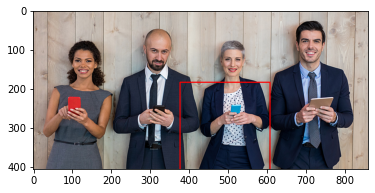

In [244]:
plt.imshow(img[:,:,::-1])

These outputs were horrible! 😮‍💨

## Face Detection (YOLO Detector)

In [140]:
! pip3 install cvlib

     |████████████████████████████████| 10.0 MB 23 kB/s 
  Created wheel for cvlib: filename=cvlib-0.2.6-py3-none-any.whl size=10044621 sha256=6bcd75e499f529f477ac8b7dac012412247a21e10f4488c228efaa2c443d27d2
  Stored in directory: /Users/cosmoremit/Library/Caches/pip/wheels/ab/cb/f5/2d027cae91342418d4a84c6955d080c2e361b60bb72db3f71c
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12075 sha256=840da9360a66cfa6d22a8a9d7facd76d6c78936379876321d7dbe0584ddda2c5
  Stored in directory: /Users/cosmoremit/Library/Caches/pip/wheels/2c/67/ed/d84123843c937d7e7f5ba88a270d11036473144143355e2747
Successfully built cvlib progressbar


In [245]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import cvlib
from cvlib.object_detection import draw_bbox

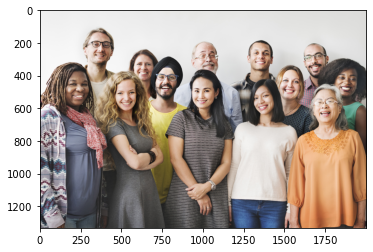

In [246]:
image = cv2.imread('images/banner-diverse-group-of-people-2.jpg')
image = image[:,:,::-1]
plt.imshow(image)

In [247]:
# Detetect faces in the image
bbox, conf = cvlib.detect_face(image)

bbox

[[924, 423, 1070, 605],
 [148, 375, 298, 583],
 [282, 145, 432, 333],
 [701, 344, 838, 529],
 [1308, 461, 1425, 635],
 [459, 428, 598, 624],
 [1283, 202, 1416, 374],
 [1459, 365, 1599, 549],
 [574, 273, 683, 426],
 [1629, 241, 1749, 407]]

In [248]:
conf

[0.9967963,
 0.9922845,
 0.98974,
 0.985159,
 0.97574687,
 0.9745241,
 0.9600945,
 0.9160227,
 0.7460307,
 0.5992773]

In [249]:
labels = []
for i in range(len(conf)):
    labels.append('person')

In [250]:
image2 = draw_bbox(image[:,:,::-1], bbox, labels, conf)

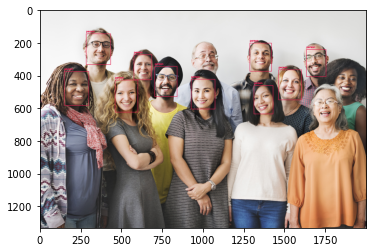

In [251]:
plt.imshow(image2[:,:,::-1])

In [259]:
from cvlib.object_detection import draw_bbox
import cvlib

In [260]:
image = cv2.imread('images/me.jpg')
cvlib.detect_face(image)

([[135, 60, 217, 168]], [0.99993753])

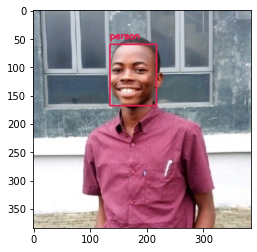

In [261]:
plt.imshow(draw_bbox(image,box,['person'], conf)[:,:,::-1])

In [277]:
!pip3 install opencv-python==4.5.3.56

     |████████████████████████████████| 42.6 MB 113 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60


In [278]:
bbox, label, conf = cvlib.detect_common_objects(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

IndexError: invalid index to scalar variable.

In [275]:
import numpy as np
x = np.array([[3, 4], [5, 6], [7, 8]])
print(x[0][0][1])

3
